In [17]:
from NOAAStations import TidalStation
from DeviceModels import Turbine, calculate_power
from Calculator import maintenance, operation

from ipywidgets import widgets, interact, fixed
from IPython.display import display
%matplotlib inline
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize
import scipy
import scipy.interpolate
from contextlib import redirect_stdout
figsize(12, 10)
sbn.set_context("paper", font_scale=1)
sns.set_style("whitegrid")


from collections import namedtuple


NameError: name 'sns' is not defined

### Testing for the maintenance monte carlo simulation

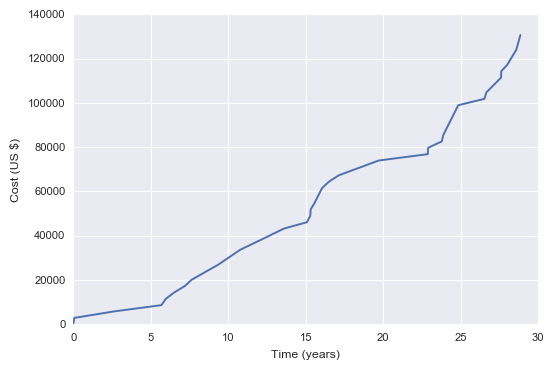

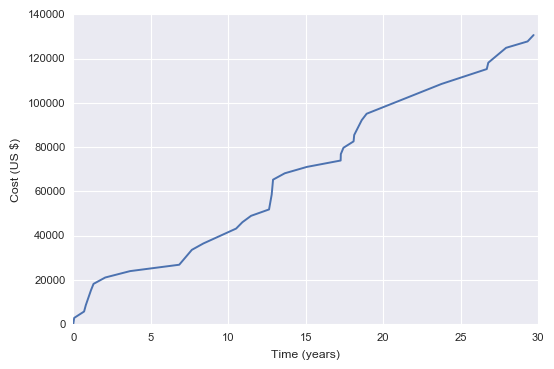

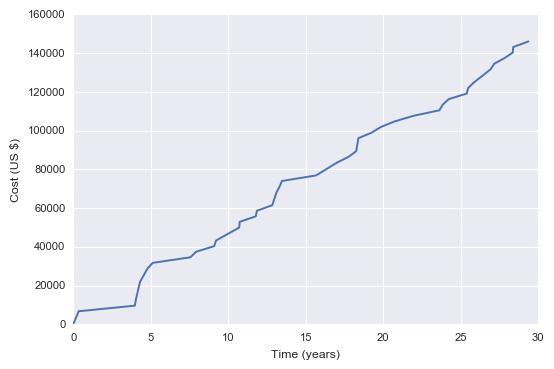

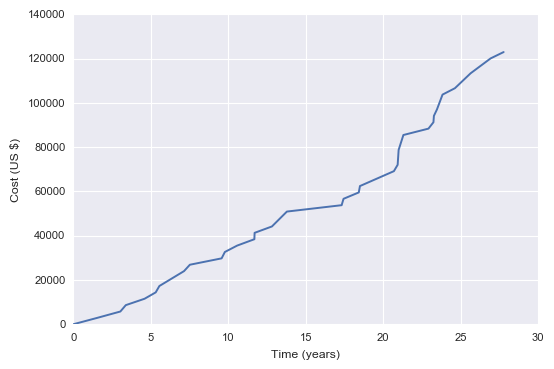

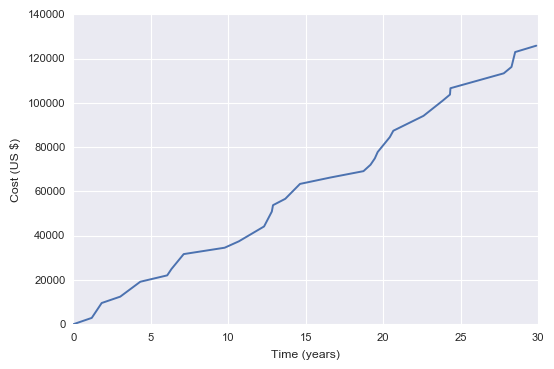

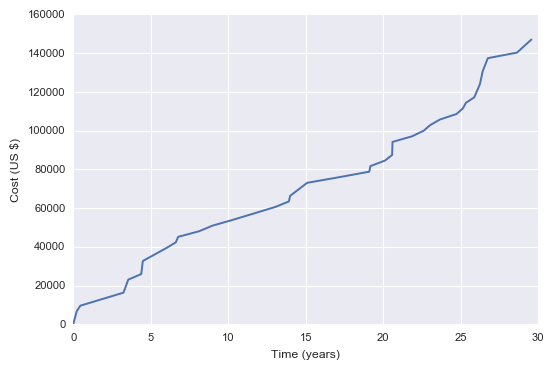

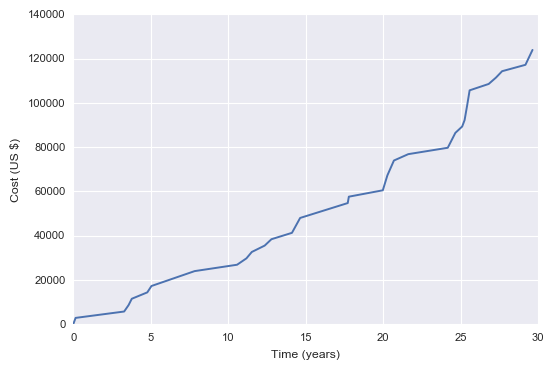

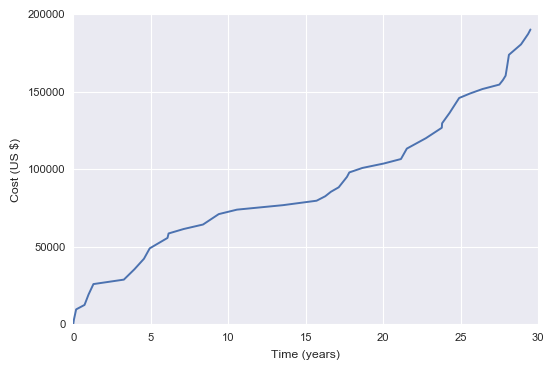

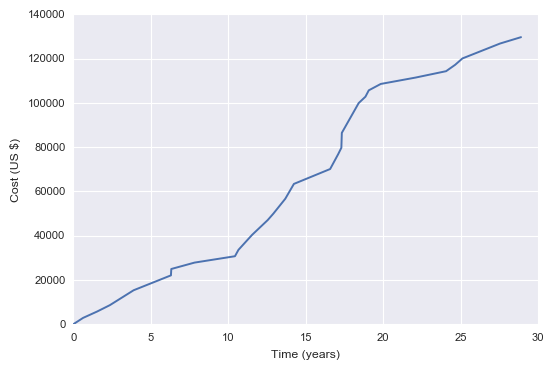

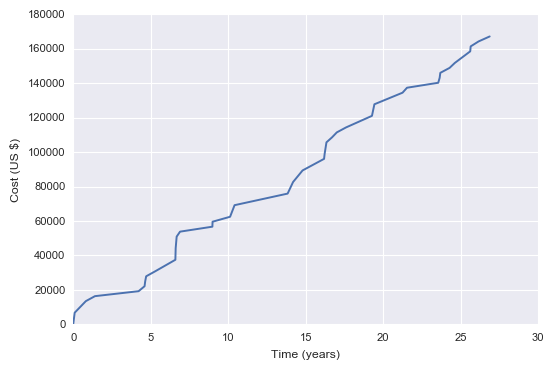

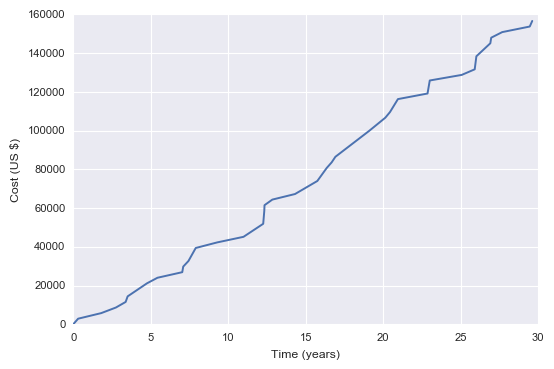

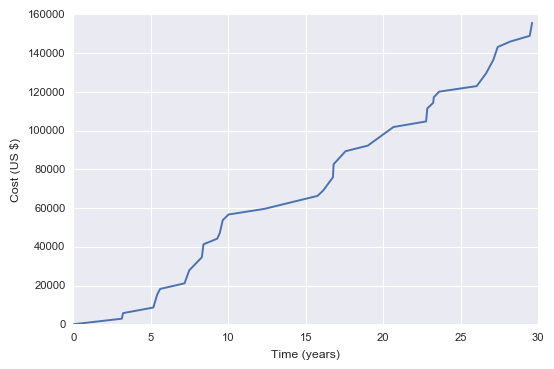

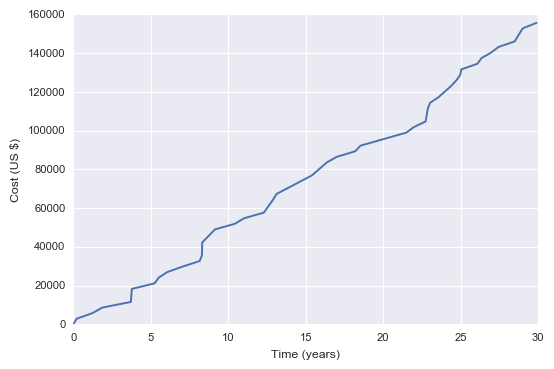

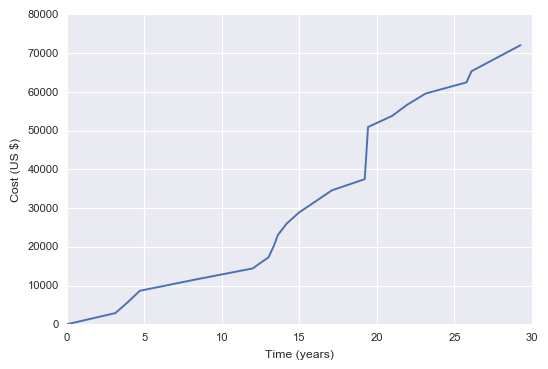

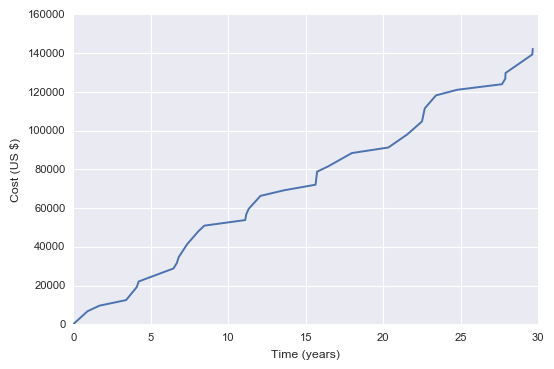

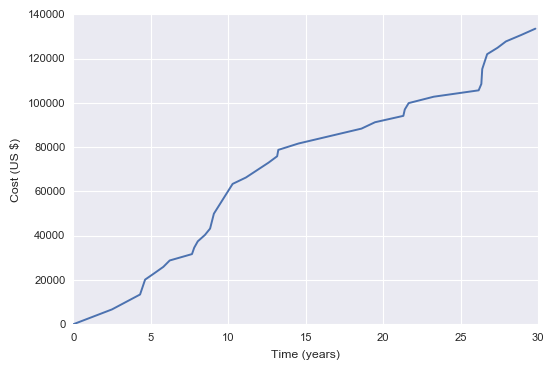

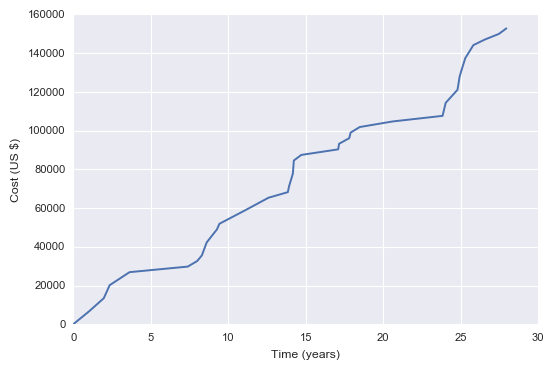

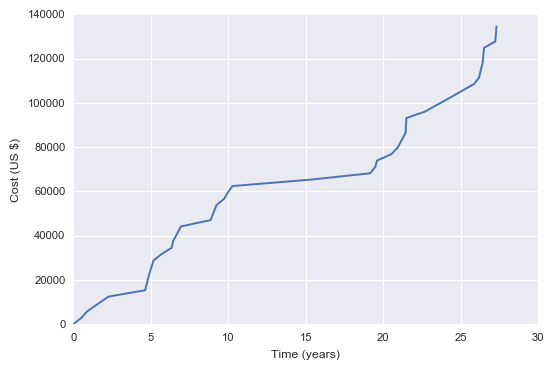

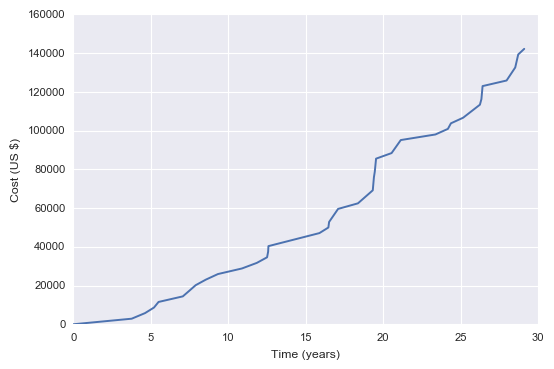

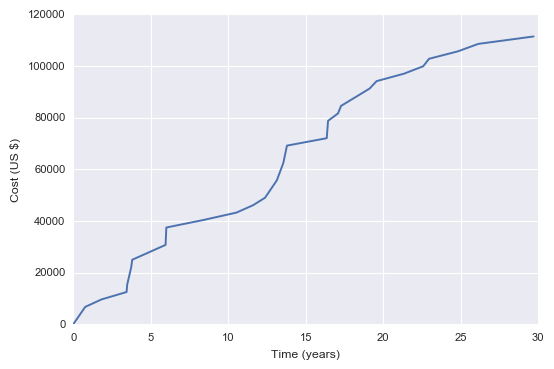

In [26]:
Maintenance_Rate = namedtuple('Parameter', 'partname minimal_rate midlevel_rate severe_rate minimal_cost midlevel_cost severe_cost number labor')

emergency_maintenance = [
    Maintenance_Rate('Blade', 0.042, 0.0273, 0.00007, 1., 4., 10., 1., 40.),
    Maintenance_Rate('Others', 0.03, 0.0299, 0.00006, 1., 4., 10., 1., 40.),
    Maintenance_Rate('Gear Box',0.2125, 0.0325, 0.0005, 1., 4., 10., 1., 40.),
    Maintenance_Rate('Electricity Generator', 0.065, 0.0545, 0.0065, 1., 4., 10., 1., 40.),
    Maintenance_Rate('Shaft', 0.002, 0.007, .001, 1., 4., 10., 1., 40.),
    Maintenance_Rate('Brake', 0.0153, 0.0325, 0.0025, 1., 4., 10., 1., 40.),
    Maintenance_Rate('Cable', 0.225, 0.09247, 0.000002, 1., 4., 10., 1., 40.),
    Maintenance_Rate('Control system', 0.1, 0.1, 0.0001, 1., 4., 10., 1., 40.)
]

emergency_events = [maintenance.EmergencyMaintenance(
            e.minimal_rate, 
            e.midlevel_rate, 
            e.severe_rate,
            e.minimal_cost, 
            e.midlevel_cost, 
            e.severe_cost,
            e.number, 
            e.labor, 
            e.partname)
            for e in emergency_maintenance]

lifetime = 30.

result_list = []
for i in range(20):
    result_list.append(maintenance.lifetimeMonteCarlo(lifetime, emergency_events, graph = True))


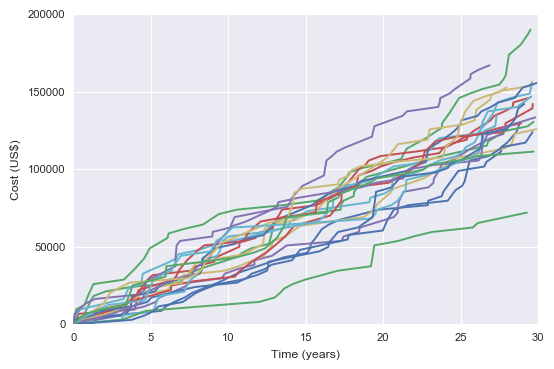

In [27]:
for result in result_list:
    time, cost = result
    plt.plot(time, cost)
plt.xlabel('Time (years)')
plt.ylabel('Cost (US$)')
plt.savefig('MonteCarlo.png', format='png', transparent=True, bbox_inches='tight')

### Harmonic Constituents 

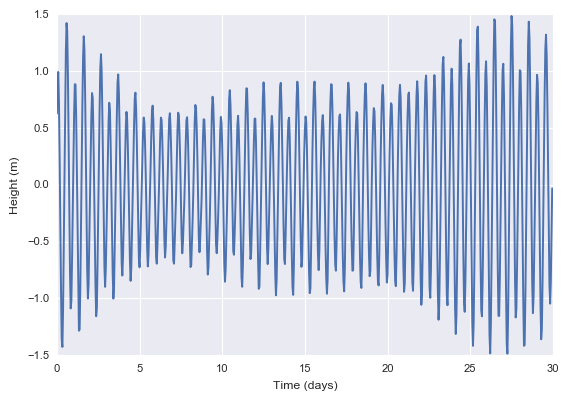

In [23]:
import plotly.plotly as py
import plotly.graph_objs as go

test_station = TidalStation(8447191)
time, height = test_station.predictWaterLevels(0, 24*30)

plt.plot(time/24, height)
plt.xlabel('Time (days)')
plt.ylabel('Height (m)')
plt.savefig('HarmonicConstituents.png', format='png', transparent=True, bbox_inches='tight')
# trace = go.Scatter(
#     x = time/24,
#     y = height,
#     mode = 'lines',
#     name = 'lines',
#     line = dict(color = 'rgb(52, 165, 218)')
# )

# layout = go.Layout(
#     title = 'Water Level Height | Bournedale, Cape Cod Canal',
#     titlefont = dict(
#         size = 26,
#         color = 'rgb(131, 135, 135)'),
#     xaxis = dict(title = 'Time (Days)',
#         titlefont = dict(
#         size = 20,
#         color = 'rgb(131, 135, 135)'),
#         tickfont=dict(
#             size=16,
#             color='rgb(131, 135, 135)'
#         )),
#     yaxis = dict(title = 'Height from MLLW (Meters)',
#         titlefont = dict(
#         size = 20,
#         color = 'rgb(131, 135, 135)'),
#         tickfont=dict(
#             size=16,
#             color='rgb(131, 135, 135)'
#         )),
#     paper_bgcolor='transparent',
#     plot_bgcolor='transparent')

# fig = go.Figure(data = [trace], layout=layout)
# py.iplot(fig, filename='harmonicConstituent')

### Testing for the power output generation

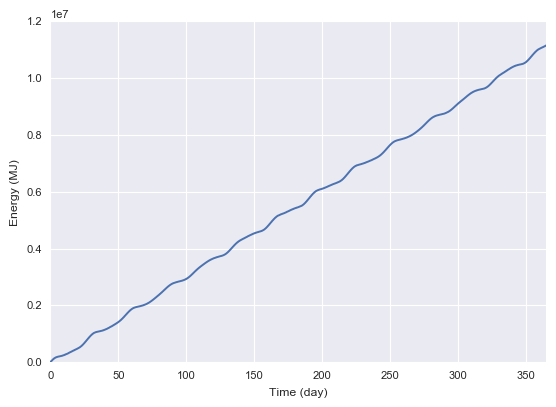

In [24]:
MCT = Turbine(1200., 0.1835, 3.55361367,  2.30706792,  1.05659521)
Sagamore = TidalStation(8447173)
results, times = calculate_power(Sagamore, MCT, 0, 0, 365*24*3600, 9.8, 3)

plt.plot(times/(24*3600), results/1000)
plt.xlim(0,365)
plt.ylabel('Energy (MJ)')
plt.xlabel('Time (day)')
plt.savefig('PowerOutput.png', format='png', transparent=True, bbox_inches='tight')

### Build power curve model

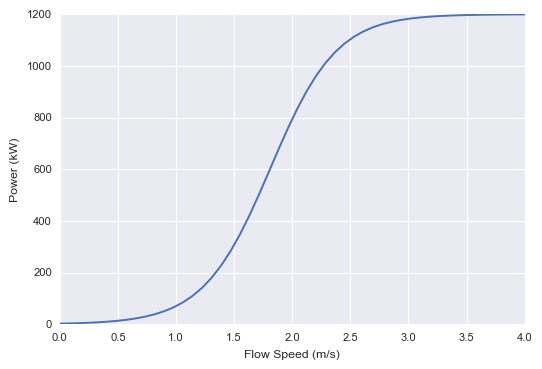

In [25]:
def richardsCurve(Velocity,B,M,g):
    return 1200*(1+.1835*np.exp(-1*B*(Velocity-M)))**(-1/g)

import scipy.optimize
import numpy as np

velocities = np.array([0,.5,1,1.5,2,2.5,3,3.5,4,10])
power = np.array([0,20,75,300,800, 1100, 1175, 1195, 1200,1200])

starting_guess = (1, 1, 1)

optimized_parameters, covariance = scipy.optimize.curve_fit(richardsCurve, 
                                                                 xdata = velocities, 
                                                                 ydata = power, 
                                                                 p0 = starting_guess)
x = np.linspace(0,4)
y = richardsCurve(x, *optimized_parameters)

%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(x,y)
plt.ylabel('Power (kW)')
plt.xlabel('Flow Speed (m/s)')
plt.savefig('RichardsCurve.png', format='png', transparent=True, bbox_inches='tight')

In [ ]:
def LevelizedCostofElectricity(station_id, 
                               grid_location,
                               lifetime, 
                               K, Q, B, M, g,
                               h_0,
                               gravity,
                               **emergency_maintentance):
    
    
    MCT = Turbine(K, Q, B, M, g)
    
    tidal_station = TidalStation(station_id)
    
    emergency_events = 
                [maintenance.EmergencyMaintenance(
                e['minimal_rate'], 
                e['midlevel_rate'], 
                e['severe_rate'],
                e['minimal_cost'], 
                e['midlevel_cost'], 
                e['severe_cost'],
                e['minimal_downtime'], 
                e['midlevel_downtime'], 
                e['severe_downtime'],
                e['number'], 
                e['labor'], 
                e['partname'])
                for e in emergency_maintentance]

    #installation_cost = installation.calculateInstallation() 
        
    time = []
    results = []
    end_loop = False
    time_tracker = 0.
    
    maintenance_costs = []
    maintenance_times = []
    
    #time to run the simulation
    while not end_loop:
        
        maintenance_event, uptime = monteCarlo(emergency_events)
        
        if time_tracker + uptime > lifetime:
            end_loop = True
            uptime = lifetime - time_tracker
        
        
        end_time = timetracker + uptime
        results_array , time_array = calculate_power(tidal_station, 
                                                     MCT, 
                                                     results[-1][-1], 
                                                     time_tracker, 
                                                     end_time, 
                                                     gravity, 
                                                     h_0)
        
        maintenance_costs.append(maintenance_event.event_cost)
        maintenance_times.append(time_tracker+uptime)
        time_tracker += uptime + maintenance_event.downtime
        results.append(results_array)
        time.append(time_array)
        
    else:
        #PUT ALL THE DATA PROCESSING HERE
    
    

In [ ]:
from SALib.sample import morris as ms
from SALib.analyze import morris as ma
from SALib.plotting import morris as mp

from SALib.sample.saltelli import sample as ss
from SALib.analyze.sobol import analyze as sa

In [ ]:
Parameter = namedtuple('Parameter', 'name nominal min max description units')
Fixed = namedtuple('Parameter', 'name value description units')
Maintenance = namedtuple('Parameter', 'name nominal min max description units')

parameters_list = [
Parameter('K', 1200.),
Parameter('Q', 0.184),
Parameter('B', 3.554),
Parameter('M', 2.307),
Parameter('g', 1.057),
Fixed('gravity' ,9.8, 'Earth is heavy', '$\frac{m}{s^2}$'),

Maintenance('minimal_rate', 500, 400, 510, 'blade','year^-1'),
Maintenance('midlevel_rate', 3.5, 3, 3.6, 'blade', 'year^-1'),
Maintenance('severe_rate', 3.5, 3, 3.6, 'blade', 'year^-1'),
    ]

parameters_dict = {i.name: i for i in parameters_list}

fixed_parameter_values = {i.name: i.value for i in parameters_list if isinstance(i,Fixed)}

salib_problem = {}
variables = [i for i in parameters_list if isinstance(i,Parameter)]
salib_problem['num_vars']=len(variables)
salib_problem['names'] = [i.name for i in variables]
salib_problem['bounds'] = [[i.min, i.max] for i in variables]
salib_problem['groups'] = None
salib_problem


